In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Conv1D, BatchNormalization, Activation, MaxPooling1D, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

import pandas as pd
import numpy as np
from numpy import genfromtxt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os, os.path
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
path = r'C:\Users\Andy Guevara\Projects\EEG Project\Np arrays'

X_train = np.load(path + '\\' + 'X_train.npy')
y_train = np.load(path + '\\' + 'y_train.npy')
X_val = np.load(path + '\\' + 'X_val.npy')
y_val = np.load(path + '\\' + 'y_val.npy')

#X_train = np.expand_dims(X_train,-1)
#X_val = np.expand_dims(X_val,-1)
X_train[0].shape

(600, 30)

In [3]:
tf.keras.backend.clear_session()

In [4]:
#https://peijin.medium.com/deep-learning-for-eegs-nad-bci-some-notes-and-some-warnings-28cfc3015a98

model_m = Sequential()
model_m.add(keras.layers.InputLayer(input_shape=(600,30)))
#model_m.add(Dropout(0.50, input_shape=(600,30)))
model_m.add(Conv1D(128, 4,padding = 'same'))
model_m.add(Conv1D(128, 4 ,padding = 'same',))
model_m.add(BatchNormalization(axis = -1))
model_m.add(Activation("relu"))
model_m.add(MaxPooling1D(2))
model_m.add(Dropout(0.50))
model_m.add(Conv1D(128, 10 ,padding = 'same'))
model_m.add(Conv1D(128, 10 ,padding = 'same'))
model_m.add(BatchNormalization(axis=-1))
model_m.add(Activation("relu"))
model_m.add(MaxPooling1D(10))
model_m.add(Flatten())
model_m.add(Dropout(0.50))
model_m.add(Dense(64, activation = 'relu'))
model_m.add(Dense(1 ,activation = 'sigmoid'))
model_m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 600, 128)          15488     
                                                                 
 conv1d_1 (Conv1D)           (None, 600, 128)          65664     
                                                                 
 batch_normalization (BatchN  (None, 600, 128)         512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 600, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 300, 128)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 300, 128)          0

In [5]:
# loss and optimizer
loss = keras.losses.BinaryCrossentropy(from_logits=True)
#loss = keras.losses.SparseCategoricalCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.01)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.001)
#optim = keras.optimizers.SGD(lr=0.01)
metrics = ["accuracy"]

model_m.compile(loss='binary_crossentropy', optimizer=optim, metrics=metrics)

In [6]:
history = model_m.fit(X_train, y_train, batch_size=32, epochs=250, validation_data=(X_val, y_val), callbacks=[reduce_lr])

Epoch 1/250
685/685 [==============================] - 20s 21ms/step - loss: 0.8029 - accuracy: 0.6005 - val_loss: 0.6526 - val_accuracy: 0.6034 - lr: 0.0100
Epoch 2/250
685/685 [==============================] - 15s 22ms/step - loss: 0.6548 - accuracy: 0.6084 - val_loss: 0.6598 - val_accuracy: 0.6034 - lr: 0.0100
Epoch 3/250
685/685 [==============================] - 15s 22ms/step - loss: 0.6564 - accuracy: 0.6085 - val_loss: 0.6547 - val_accuracy: 0.6034 - lr: 0.0100
Epoch 4/250
685/685 [==============================] - 15s 22ms/step - loss: 0.6546 - accuracy: 0.6083 - val_loss: 0.6495 - val_accuracy: 0.6034 - lr: 0.0100
Epoch 5/250
685/685 [==============================] - 15s 22ms/step - loss: 0.6527 - accuracy: 0.6074 - val_loss: 0.6390 - val_accuracy: 0.6034 - lr: 0.0100
Epoch 6/250
685/685 [==============================] - 15s 22ms/step - loss: 0.6504 - accuracy: 0.6085 - val_loss: 0.6397 - val_accuracy: 0.6034 - lr: 0.0100
Epoch 7/250
685/685 [==============================]

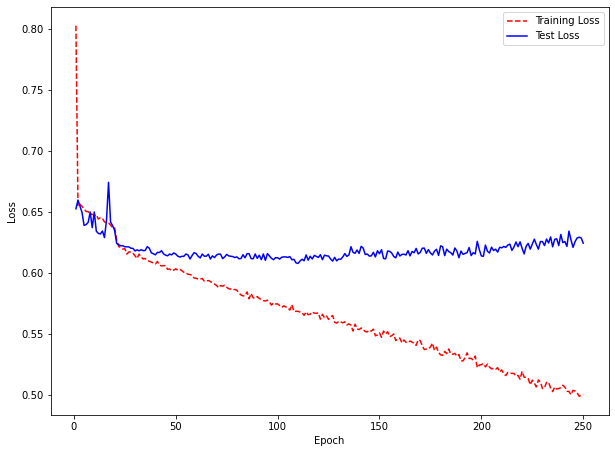

In [7]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(10,7.5))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
#plt.ylim(-0.5,5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.title('ResNet-50 Categorical C-E Loss')
plt.show()

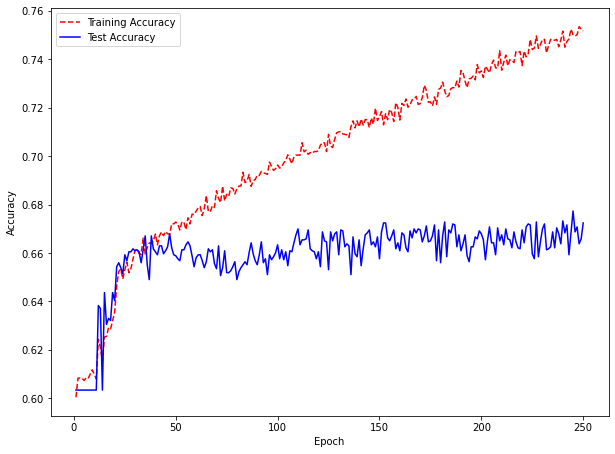

In [8]:
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
plt.figure(figsize=(10,7.5))
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
#plt.ylim(-0.5,5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.title('ResNet-50 Categorical C-E Loss')
plt.show()